In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
def get_df(file_str):
    mf = pd.read_csv(file_str)
    mf['t_diff'] = mf.t.diff()
    mf['success'] = (mf.r > 9000)*1.
    #print(mf.head())
    print(mf.describe())
    print("Mean Reward last 100 Episodes: {}".format(np.mean(mf.r.iloc[-100:])))
    return mf

def get_scatter_plots(df):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.r,marker='.')
    plt.ylabel('reward')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.l,marker='.')
    plt.ylabel('timesteps per episode')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.t_diff,marker='.')
    plt.ylabel('time per episode')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.success,marker='.')
    plt.ylabel('success')
    plt.xlabel('episode')
    plt.show()
    

def get_rolling_plots(df):
    rolling_window_size = 100
    if len(df.r) < 1000:
        rolling_window_size = 50
        
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.r.rolling(rolling_window_size).mean())
    plt.ylabel('reward')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.l.rolling(rolling_window_size).mean())
    plt.ylabel('timesteps')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.t_diff.rolling(rolling_window_size).mean())
    plt.ylabel('time')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.success.rolling(rolling_window_size).mean())
    plt.ylabel('success')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    

def get_results(lvl_array):
    for i in lvl_array:
        print(i)
        file_str = '{}/monitor.csv'.format(i)
        df = get_df(file_str)
        print(i)
        get_scatter_plots(df)
        print(i)
        get_rolling_plots(df)
        
def get_level_comparison(lvl_array):
    df_array = []
    for i in range(len(lvl_array)):
        file_str = '{}/monitor.csv'.format(lvl_array[i])
        df_array.append(pd.read_csv(file_str))
        df_array[i]['t_diff'] = df_array[i].t.diff()
        df_array[i]['success'] = (df_array[i].r > 9000)*1.
        print(lvl_array[i])
        print(df_array[i].describe())
        
    get_rolling_comparison(df_array,lvl_array)

    
def plot_rolling_mean(df,col_name,rolling_window_size=100):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df[col_name].rolling(rolling_window_size).mean())
    plt.ylabel(col_name)
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    
def get_rolling_comparison(df_array, lvl_array):
    rolling_window_size = 100
    if len(df_array[0]) < 1000:
        rolling_window_size = 50
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " reward")
        temp_index += 1
        plot_rolling_mean(i,'r',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " success")
        temp_index += 1
        plot_rolling_mean(i,'success',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " timesteps")
        temp_index += 1
        plot_rolling_mean(i,'l',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        a4_dims = (11.7, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        print(lvl_array[temp_index], " reward")
        plt.scatter(i.index,i.r,marker='.')
        plt.ylabel('reward')
        plt.xlabel('episode')
        plt.show()    
        temp_index += 1

logs
                  r             l              t        t_diff  success
count  33821.000000  33821.000000   33821.000000  33820.000000  33821.0
mean      27.174537   1830.209929   46631.430670      3.712279      0.0
std       29.455075    926.332630   35656.251975      3.107451      0.0
min        0.000000    289.000000       2.520309      0.454171      0.0
25%        6.000000   1183.000000   18212.377258      1.839134      0.0
50%       11.000000   1503.000000   36304.958193      2.432305      0.0
75%       48.000000   2290.000000   71821.201437      5.070423      0.0
max      115.000000   7968.000000  125551.808913     61.404943      0.0
Mean Reward last 100 Episodes: 83.44
logs


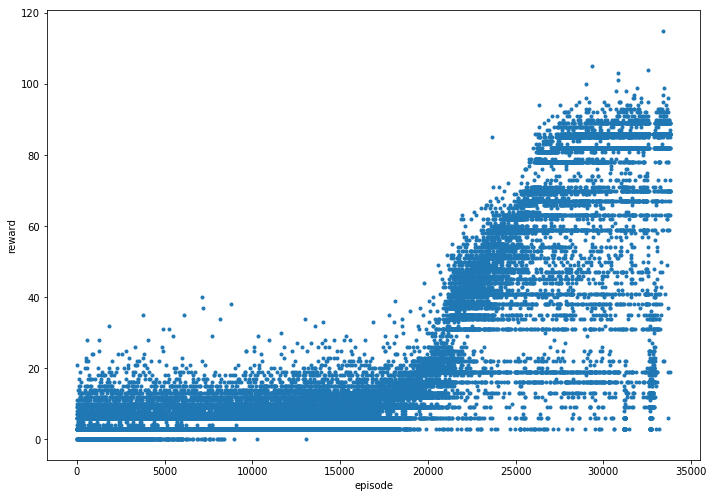

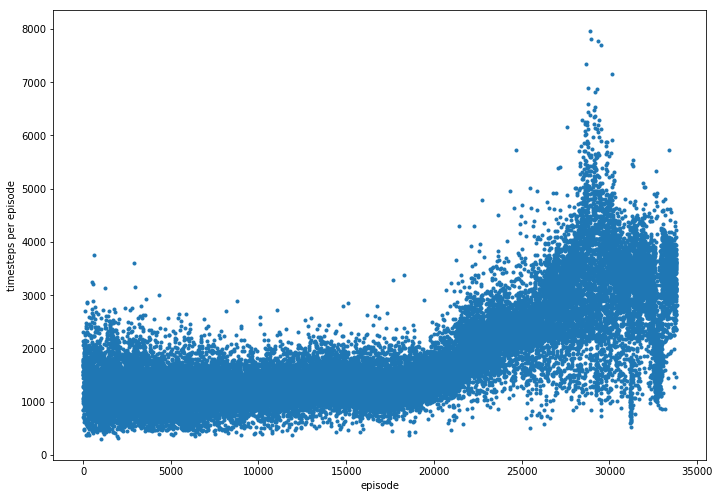

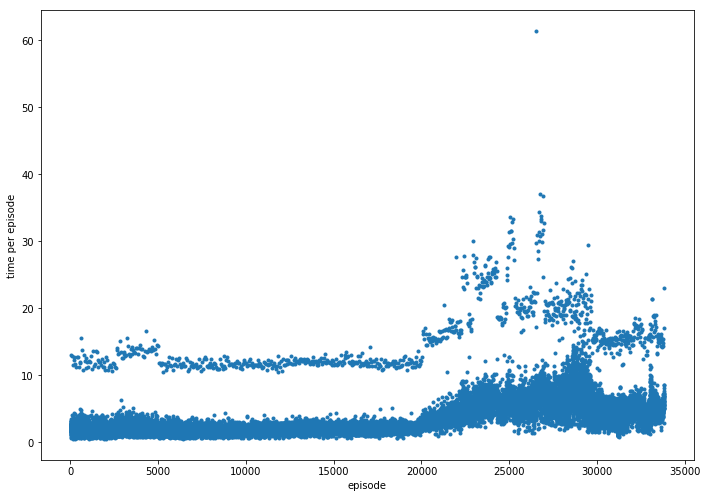

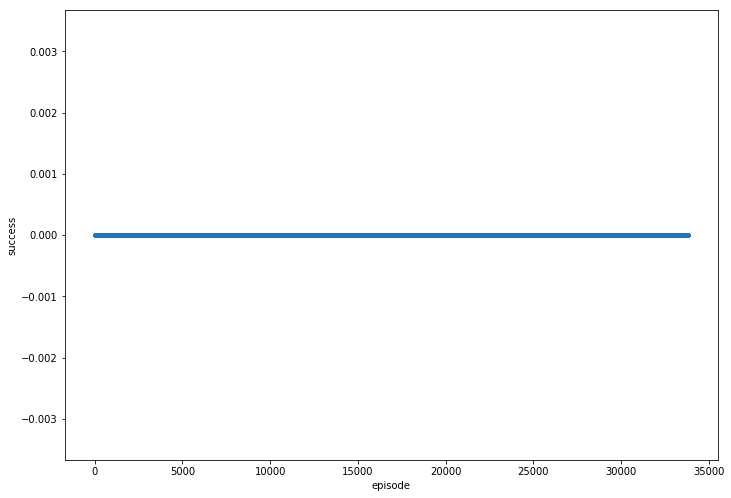

logs


/home/paperspace/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


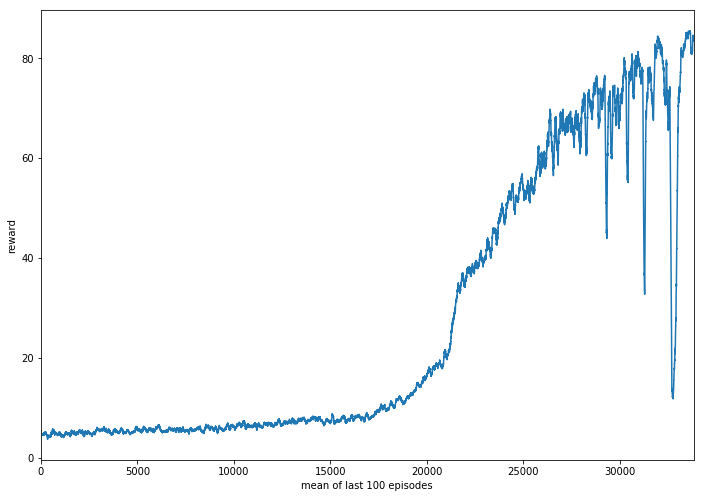

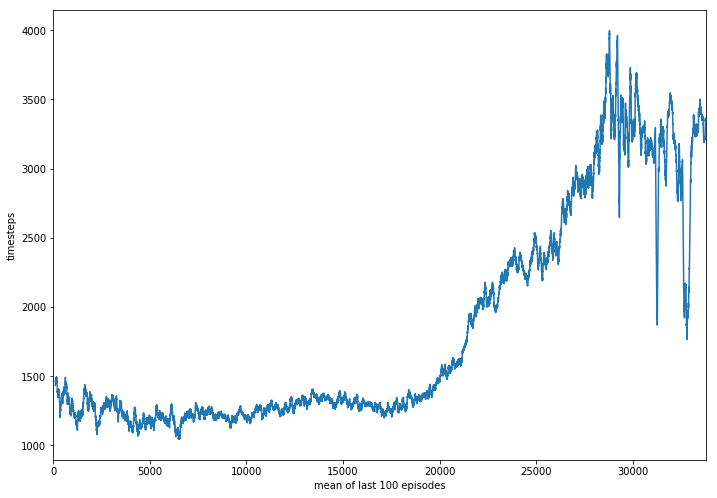

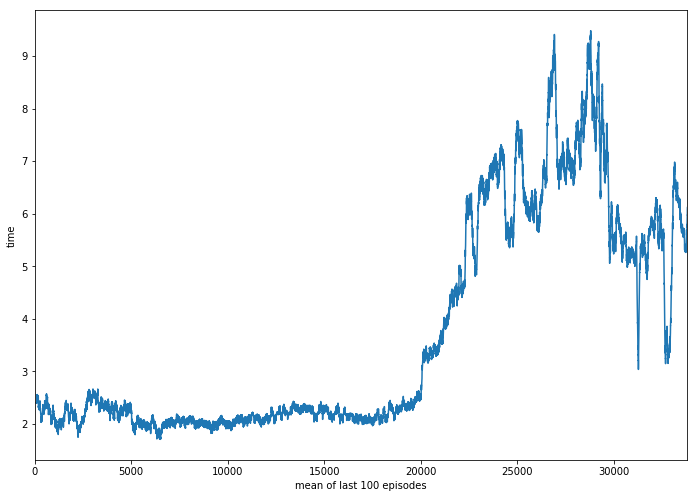

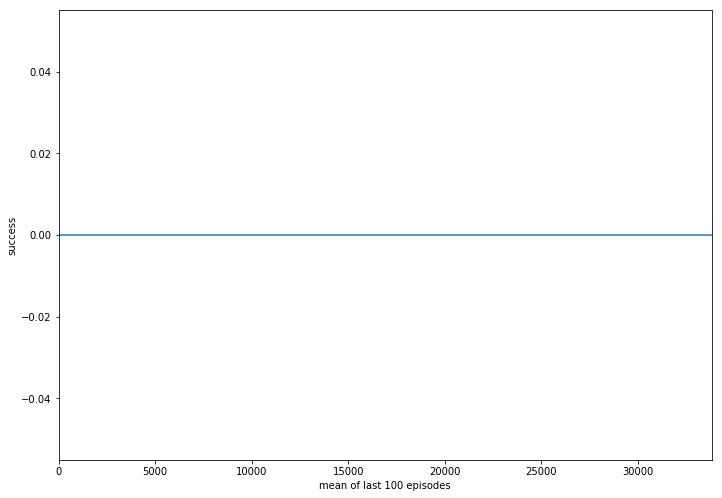

In [7]:
best_run_array = [
    'logs'
]

get_results(best_run_array)